# --> Importations

In [49]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --> Importation et normalisation des données en entrée

In [50]:
#Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist                            #Librairie dataset
(images, targets), (_, _) = fashion_mnist.load_data() #On ignore les informations avec _
images = images[:10000]                                                    #On ne prend pas tout le dataset pour aller plus vite
targets = targets[:10000]

#Normalisation des valeurs de 0 a 255 => 0 a 1
from sklearn.preprocessing import StandardScaler
print("Avant normalisation")
print("Moyenne valeur pixel: ", images.mean())   #On voit que ces deux valeurs sont beaucoup
print("Ecart type valeur pixel: ", images.std()) #trop eleves, il faut donc normaliser
images = images.reshape(-1, 784)                 #On flatten les images en entree 2D => 1D
images = images.astype(float)                    #On definit les valeurs comme etant des float
scaler = StandardScaler()                        #StandardScaler est une fonction de normalisation qui diminue l'ecart type des valeurs
images = scaler.fit_transform(images)
print("Apres normalisation")
print("Moyenne valeur pixel: ", images.mean())   #On voit que ces deux valeurs ont bien
print("Ecart type valeur pixel: ", images.std()) #change et que la normalisation a eu lieu

#Normalisation des valeurs pour images_test
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)
images_test = scaler.fit_transform(images)

#Affichage de nos shape
print("\nShape des images : ", images.shape)
print("Shape de notre liste de classification : ", targets.shape)
#print(images[0]) #Tableau 2D de niveau de gris (0 a 255)
#print(targets[0]) #Numero de la classe

Avant normalisation
Moyenne valeur pixel:  73.00877385204082
Ecart type valeur pixel:  90.2745808471392
Apres normalisation
Moyenne valeur pixel:  -1.0476880134421886e-18
Ecart type valeur pixel:  1.0000000000000007

Shape des images :  (10000, 784)
Shape de notre liste de classification :  (10000,)


# --> Creation du validation set

In [51]:
#Le validation set doit etre different du train set. Le but est de verifier la capacite d'extrapolation 
#pendant l'entrainement du reseau de neuronne. Le model sera jamais entraine sur ce validation set
#Grace a cela, on s'assure que la generalisation fonctionne et que le reseau n'apprend pas par coeur le train set
#Ce probleme est appelé l'overfitting. Pour reperer l'overfitting il faut afficher la courbe d'erreur du train set 
#avec la courbe d'erreur du validation set. Si la courbe du validation set est au dessus de la courbe du train set
#alors nous avons un overfitting

#Nous avons donc un train set, un validation set, et un test set. Ils sont tous les trois totalement differents.

#Il ne faut agir sur les parametres du reseau que en fonction du train set et non du validation set / test set.
#C'est pour cela que les donnees de tests ne sont pas donnees en competition kaggle avant d'avoir upload le model.
#Il faut vraiment faire attention a ce que les donnees du train set soit assez eloignes des donnees du
#validation test et du test set.

from sklearn.model_selection import train_test_split
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1) #0.2 signifie 20% pour le test set
print("Train set images shape : ", images_train.shape, ", Train set targets shape : ", targets_train.shape)
print("Test set images shape : ", images_test.shape, ", Test set targets shape : ", targets_test.shape)

Train set images shape :  (8000, 784) , Train set targets shape :  (8000,)
Test set images shape :  (2000, 784) , Test set targets shape :  (2000,)


# --> Visualisation d'une des images du dataset

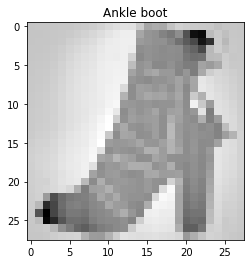

In [52]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bad", "Ankle boot"]
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary") #On precise avec "binary" que nous somme sur une image en noir et blanc
plt.title(targets_names[targets[11]])
plt.show()

In [53]:
#print(images[10][0]) #Affiche première ligne de l'image 10
#print(targets_names[targets[10]]) #Type de cette image

In [54]:
#On veut creer un reseau de neurone avec 784 input
print("Taille pixel image : ", images[0].size)
#On veut 2 layers dont la premiere a 256 neurones et la deuxieme 128
#Notre output layer aura 10 neurones car 10 types de classification
print("\nNombre de classificiation : ", len(targets_names))

Taille pixel image :  784

Nombre de classificiation :  10


In [55]:
#Comment formater les données en input
#model = tf.keras.models.Sequential() #On creer un model sequentiel
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) #On flatten notre image 28 par 28
#print("Shape avant flatten : ", images[0:1].shape) #On voit ici qu'elle est en 2D
#model_output = model.predict(images[0:1])
#print("Shape après flatten : ", model_output.shape) #On voit ici qu'elle a bien été flatten

# --> Ajout des layers

In [56]:
#Notre model sera de type sequentiel
model = tf.keras.models.Sequential() #Chaque neurones d'une couche C est connecte a chaque neurones de la couche C-1
#Ajout des layers
model.add(tf.keras.layers.Dense(256, activation="relu")) #256 neurones, fonction activation ReLU
model.add(tf.keras.layers.Dense(128, activation="relu")) #128 neurones, fonction activation ReLU
#10 neurones output car 10 types de classification, activation softmax pour distribution normal probabiliste
model.add(tf.keras.layers.Dense(10, activation="softmax")) 

In [57]:
#Tentative de prediction
model_output = model.predict(images[3:4])
print("Prediction du type de l'image :\n", model_output) 
print("\nType de l'image", targets[3:4])

Prediction du type de l'image :
 [[0.11443271 0.0416492  0.06186051 0.0926641  0.10549659 0.10414217
  0.14820059 0.09601758 0.13331965 0.10221694]]

Type de l'image [3]


In [58]:
#On peut afficher un resume du model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# --> Qu'est ce que la categorical crossentropy ?

In [59]:
images_test = images[:5]                     #On ne prends que les 5 premieres images pour notre test
labels_test = targets[:5]
print("Images shape : ", images_test.shape)  #Affichage de la shape de nos images et targets
print("Targets shape : ", labels_test.shape)
outputs_test = model.predict(images_test)    #Tentative de prediction du model non entrainé pour les 5 premieres images
print("Output shape : ", outputs_test.shape) #Affichage de la shape de ce resultat
print("Output :\n", outputs_test)             #et du resultat

#Ici la shape de l'output est (5,10) donc nous avons pour chacune des 5 images
#10 valeurs qui sont les probabilites que l'image soit classifiee pour chacun des labels
#La categorical crossentropy filtre ces 10 valeurs pour ne garder que celle qui correspond
#a la "bonne reponse", celle qui devrait etre proche de 1 si le reseau est bien entraine
#Cette fonction de perte s'occupe donc seulement de cette valeur et cela ne pose pas de
#probleme car le softmax va creer une distribution de proportionalite sur la sortie.
#En effet, si on on modifie cette valeur en l'augmentant, cela faire diminuer les autres
#de par le softmax
filtered_outputs_test = outputs_test[np.arange(5), labels_test]
print("Output apres le filtre : ", filtered_outputs_test)

#Nous avons maintenant les probabilites qui devrait etre augmente pour chacune des images
#On applique alors np.log() 
#En effet des donnees mit au logarithme permet une meilleur convergence
#On sait qu'on utilise la descente de gradient pour pouvoir minimiser une erreur
#Quand on arrive a minimiser une erreur, on dit qu'on converge vers une solution
#Si on utilise le logarithme cela sera plus pratique pour effectuer la descente de gradient
#Le logarithme de change pas l'ordre croissant des valeurs car c'est une fonction
#qui est monotone croissante
log_filtered_outputs_test = np.log(filtered_outputs_test)
print("Output apres filtre et log : ", log_filtered_outputs_test)

#On veut minimiser une valeur qui est la moyenne de notre output
#On veut que cette valeur soit positive, on ajoute donc un "-" devant
print("Moyenne de cet output : ", - log_filtered_outputs_test.mean())

#Lors de la specification de la fonction de loss avec compile() on utilise "sparse_categorical_crossentropy"
#Le "sparse_" ici specifie que l'on peut utilise nos label comme etant [0, 1, 2, ..., 9]
#au lieu d'utiliser une representation "one hot encoding", qui pour nous donner la prediction "9"
#nous donnerait un vecteur one hot [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

#On choisit donc sparse_ si on a des labels specifique en entree
#on choisit categorical_crossentropy si nous avons un softmax sur l'output et plusieurs categories

Images shape :  (5, 784)
Targets shape :  (5,)
Output shape :  (5, 10)
Output :
 [[0.01020476 0.03128908 0.02860956 0.11458374 0.09838049 0.06611865
  0.44810006 0.10473747 0.08253779 0.01543832]
 [0.07235305 0.02160493 0.01878843 0.04022615 0.09369024 0.05358591
  0.4876414  0.00236151 0.19177173 0.01797667]
 [0.05030513 0.08055469 0.06288798 0.11674237 0.10452901 0.09426714
  0.24284644 0.08174963 0.09982629 0.06629126]
 [0.11443268 0.04164922 0.06186054 0.09266409 0.10549658 0.10414215
  0.14820057 0.09601758 0.13331965 0.10221696]
 [0.04626221 0.0878028  0.03369135 0.07826749 0.17848766 0.0792309
  0.15840678 0.03750496 0.11409558 0.18625027]]
Output apres le filtre :  [0.01543832 0.07235305 0.05030513 0.09266409 0.04626221]
Output apres filtre et log :  [-4.1709027 -2.6261976 -2.989648  -2.3787742 -3.0734298]
Moyenne de cet output :  3.0477903


# --> Ajout de la fonction loss, optimizer, metrics

In [60]:
#Compilation du model
model.compile(
    loss="sparse_categorical_crossentropy",  #Fonction de perte
    optimizer="sgd",                         #Optimisation stochastic gradient descent
    metrics=["accuracy"]                     #Accuracy est la metrique que l'on veut utiliser
)

# --> Entrainement du model

In [61]:
#Entrainement du model
#On passe 10 fois sur l'entierete du datasat
#On prends 20% pour le validation set
history = model.fit(images_train, targets_train, epochs=50, validation_split=0.2) 

Epoch 1/50
200/200 [==============================] - 1s 1ms/step - loss: 1.2364 - accuracy: 0.5817 - val_loss: 0.6250 - val_accuracy: 0.7819
Epoch 2/50
200/200 [==============================] - 0s 937us/step - loss: 0.5656 - accuracy: 0.8015 - val_loss: 0.5426 - val_accuracy: 0.7969
Epoch 3/50
200/200 [==============================] - 0s 977us/step - loss: 0.4733 - accuracy: 0.8370 - val_loss: 0.5047 - val_accuracy: 0.8106
Epoch 4/50
200/200 [==============================] - 0s 977us/step - loss: 0.4047 - accuracy: 0.8595 - val_loss: 0.5005 - val_accuracy: 0.8138
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8775 - val_loss: 0.4681 - val_accuracy: 0.8256
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8806 - val_loss: 0.4518 - val_accuracy: 0.8344
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8891 - val_loss: 0.4461 - val_accuracy: 0.8400


# --> Affichage des courbes après entrainement

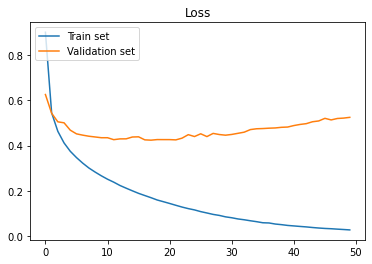

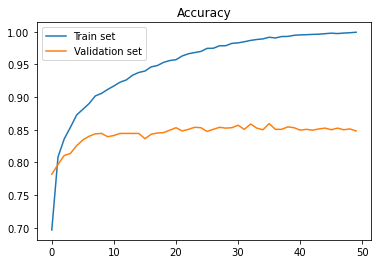

In [62]:
#Affichage des resultats finaux

#Train set data
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]
#Validation set data
val_loss_curve = history.history["val_loss"]
val_acc_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train set")
plt.plot(val_loss_curve, label="Validation set")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train set")
plt.plot(val_acc_curve, label="Validation set")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()